<font color="#CC3D3D"><p>
# Decision Tree based Ensemble Models

<img align='left' src="https://cdn-images-1.medium.com/max/1000/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg" width=700, height=500>

##### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.data.shape, data.target.mean()

((569, 30), 0.6274165202108963)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

In [4]:
hyperparam = {'n_estimators': 300, 'random_state': 0}

<font color="blue"><p>
### Bagging
<img align='left' src="http://drive.google.com/uc?export=view&id=1px4nXiYkoRZrPpnHlkYn0hWfGih9SHpB" width=650, height=500>

배깅  
- Bagging은 Bootstrap Aggregation의 약자  
- 배깅은 샘플을 여러 번 뽑아(Bootstrap) 각 모델을 학습시켜 결과물을 집계(Aggregration)하는 방법

In [5]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(**hyperparam) # 딕셔너리에 별 두개 추가하면 파라미터 값을 넘기는 역할 n_estimator = 300, random_state=0
bagging.fit(X_train, y_train).score(X_test, y_test)

0.9790209790209791

<font color="blue"><p>
### Random Forest (RF)
<img align='left' src="https://c.mql5.com/2/33/image1__1.png">

랜덤포레스트  
- 랜덤 포레스트는 앙상블 머신러닝 모델  
- 다수의 의사결정 트리를 만들고, 그 나무들의 분류를 집계해서 최종적으로 분류  
- 오버피팅을 피하기 위해 임의(random)의 숲을 구성  
- 다수의 나무들로부터 분류를 집계하기 때문에 오버피팅이 나타나는 나무의 영향력을 줄일 수 있음  
- 모든 의사결정 트리는 학습 데이터 세트에서 임의로 하위 데이터 세트를 추출하여 생성, 중복을 허용하기 때문에 단일 데이터가 여러번 선택될 수 있음 : 배깅(bagging)  
- 나무를 만들 때는 모든 속성(feature)들에서 임의로 일부를 선택하고 그 중 정보 획득량이 가장 높은 것을 기준으로 데이터를 분할  
- 만약 데이터 세트에 n개의 속성이 있는 경우 n제곱근 개수만큼 무작위로 선택하는 것이 일반적

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(**hyperparam)
rf.fit(X_train, y_train).score(X_test, y_test)

0.972027972027972

#### Boosting  
- 여러 개의 약한 Decision Tree를 조합해서 사용하는 Ensemble 기법  
- 약한 예측 모형들의 학습 에러에 가중치를 두고, 순차적으로 다음 학습 모델에 반영하여 강한 예측모형 생성

<font color="blue"><p>
### AdaBoost (Adaptive Boosting)  
<img align='left' src="https://miro.medium.com/max/850/1*DwvwMlOcT1T9hZwIJvMfng.png" width=800, height=600>
<img align='left' src='http://drive.google.com/uc?export=view&id=1sg3cRbLb-6c8RFNYyzYX32TIO8vXKoLZ' width=650, height=400>

에이다부스트  
1. 약한 학습기 (Weak Learner)로 구성되어 있으며, 약한 학습기는 Stump의 형태입니다.  
2. 어떤 Stump는 다른 Stump보다 가중치가 높습니다. (Amount of Say가 큽니다.)  
3. 각 Stump의 error는 다음 Stump의 결과에 영향을 줍니다.

In [7]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(**hyperparam)
ada.fit(X_train, y_train).score(X_test, y_test)

0.9790209790209791

<font color="blue"><p>
### Gradient Boosting (GBM) #####   
<br/><img src="https://explained.ai/gradient-boosting/images/golf-dir-vector.png" width=800, height=600>   
<img src='http://drive.google.com/uc?export=view&id=1IPejYVq077Z1HZLkl3_DpSgtjwXzcGAf' width=550, height=400>

그레디언트 부스팅  
- 잔차를 학습하는 모델

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(**hyperparam)
gbm.fit(X_train, y_train).score(X_test, y_test)

0.965034965034965

<font color="blue"><p>
### eXtreme Gradient Boosting (XGBoost) #####   
<img align='left' src='https://dzone.com/storage/temp/13069535-xgboost-features.png'>

**XGBoost**의 성능에 가장 큰 영향을 미치는 하이퍼파라미터는 다음과 같다:

| 파라미터 이름 | 파라미터 유형 | 권장 범위 |
|---|:---:|---:|
|**reg_alpha**|Continuous|**0 ~ 1000**|
|colsample_bytree|Continuous|0.5 ~ 1|
|**learning_rate**|Continuous|**0.1 ~ 0.5**|
|gamma|Continuous|0 ~ 5|
|reg_lambda|Continuous|0 ~ 1000|
|max_depth|Integer|0 ~ 10|
|**min_child_weight**|Continuous|**0 ~ 120**|
|**num_round**|Continuous|**1 ~ 4000**|
|**subsample**|Continuous|**0.5 ~ 1**|

XGBoost  
- Extreme Gradient Boosting  
- 알고리즘을 병렬 학습이 지원되도록 구현한 라이브러리, 분류 속도 빠름  
- XGBoost는 자체에 과적합 규제 기능으로 강한 내구성  
- Early Stopping(조기 종료) 기능 제공  

In [9]:
from xgboost import XGBClassifier

xgb =  XGBClassifier(**hyperparam)
xgb.fit(X_train, y_train).score(X_test, y_test)

C:\Users\zyunhyeok\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.986013986013986

### Performance Comparison Between Ensemble Models

C:\Users\zyunhyeok\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:10:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:10:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:10:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:10:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

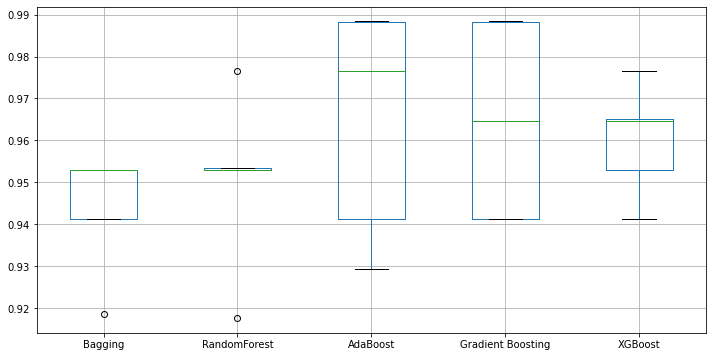

In [10]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation

kfold = KFold(n_splits=5, random_state=0) # k=5, split the data into 5 equal parts
xyz = []
accuracy = []
std = []
classifiers = ['Bagging', 'RandomForest', 'AdaBoost', 'Gradient Boosting', 'XGBoost']
models = [bagging, rf, ada, gbm, xgb]

for model in models:
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

models_dataframe = pd.DataFrame({'CV Mean':xyz,'Std':std}, index=classifiers) 
print(models_dataframe)
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=classifiers)
box.T.boxplot()
plt.show()

<font color="#CC3D3D"><p>
# End